/tmp/ipython-input-2507273321.py:27: RuntimeWarning: overflow encountered in divide
  a = F / m
/usr/local/lib/python3.12/dist-packages/numpy/_core/numeric.py:1716: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b1, out=cp2)
/usr/local/lib/python3.12/dist-packages/numpy/_core/numeric.py:1717: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b0, out=tmp)
/tmp/ipython-input-2507273321.py:28: RuntimeWarning: invalid value encountered in add
  v[i + 1] = v[i] + a * dt


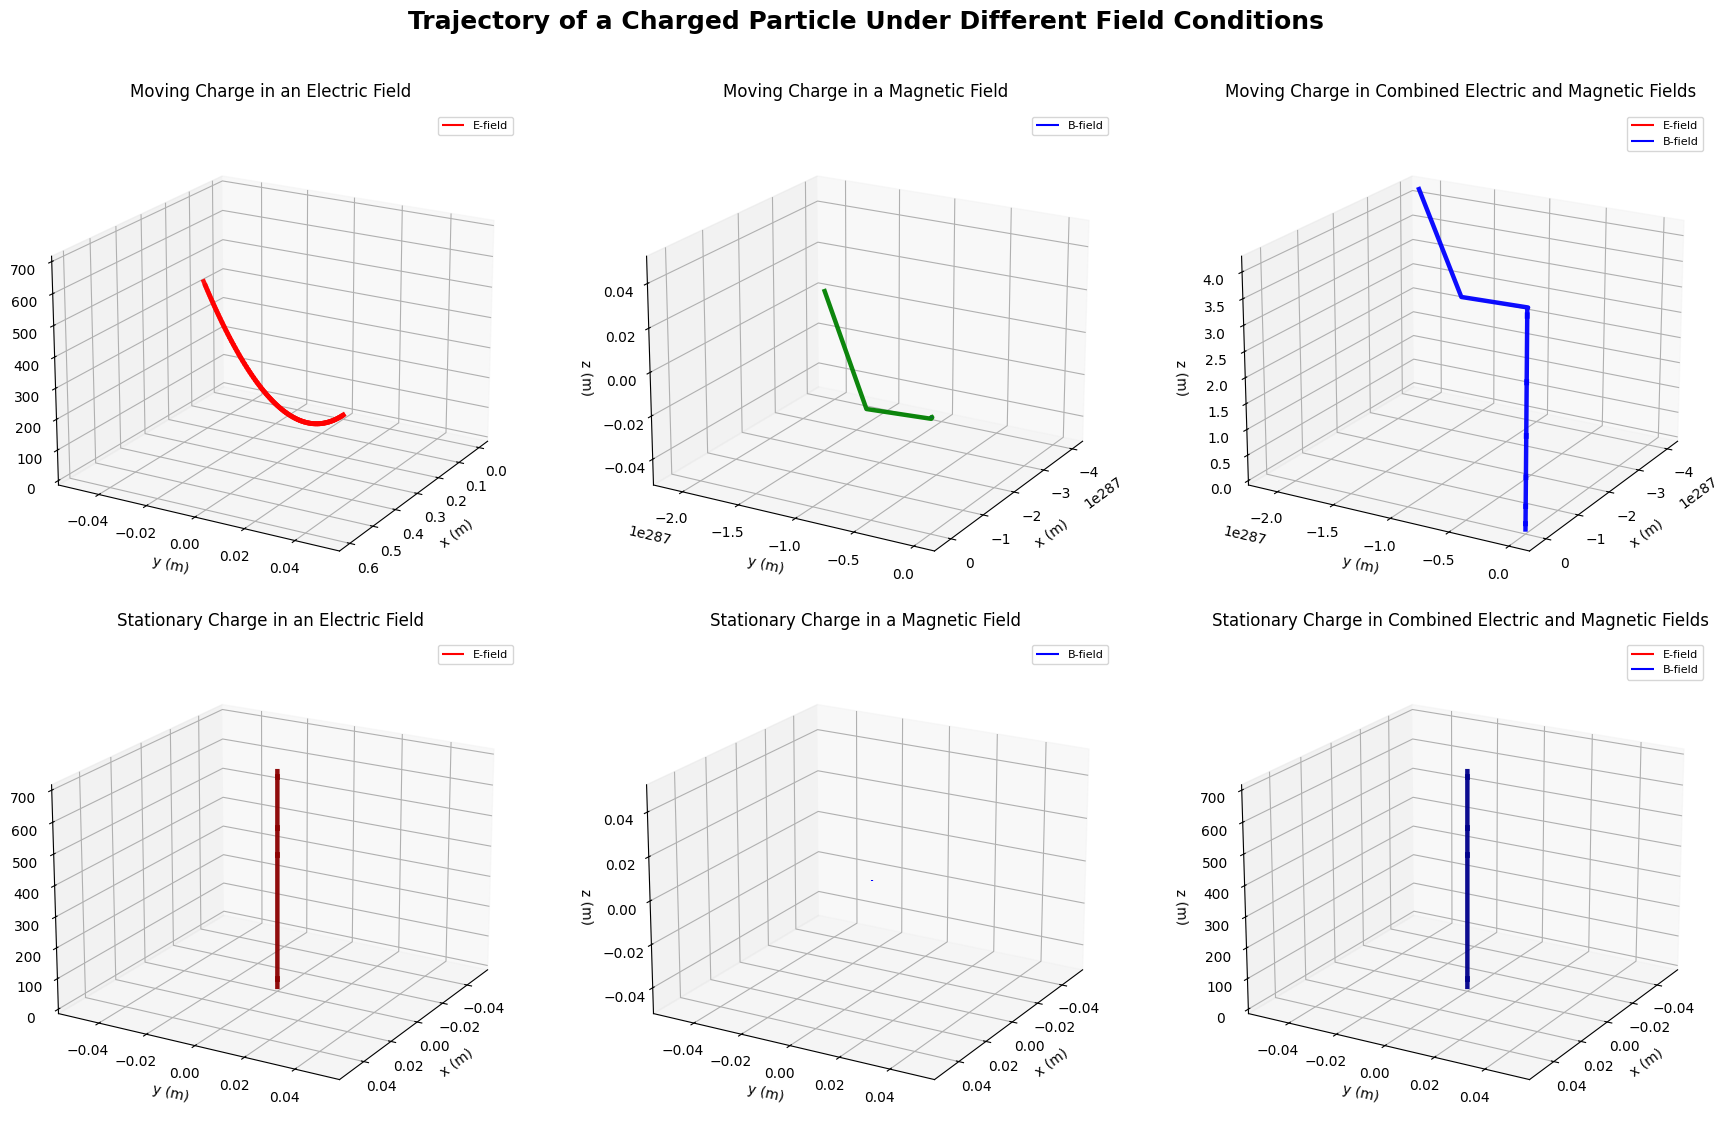

In [1]:
import numpy as np
import matplotlib.pyplot as plt


q = 1.6e-19     # charge (C)
m = 9.11e-31    # electron mass (kg)
dt = 5e-11      # time step (s)
steps = 4000    # number of time steps


E = np.array([0, 0, 2e5])   # Electric field (V/m)
B = np.array([0, 0, 1])     # Magnetic field (T)


v0_nonzero = np.array([3e6, 0, 0])
v0_zero = np.array([0, 0, 0])

colors = ['red', 'green', 'blue', 'darkred', 'darkgreen', 'darkblue']


def simulate(E, B, v0):
    r = np.zeros((steps, 3))
    v = np.zeros((steps, 3))
    v[0] = v0
    for i in range(steps - 1):
        F = q * (E + np.cross(v[i], B))
        a = F / m
        v[i + 1] = v[i] + a * dt
        r[i + 1] = r[i] + v[i] * dt
    return r


cases = [
    ("Moving Charge in an Electric Field", E, np.array([0,0,0]), v0_nonzero),
    ("Moving Charge in a Magnetic Field", np.array([0,0,0]), B, v0_nonzero),
    ("Moving Charge in Combined Electric and Magnetic Fields", E, B, v0_nonzero),
    ("Stationary Charge in an Electric Field", E, np.array([0,0,0]), v0_zero),
    ("Stationary Charge in a Magnetic Field", np.array([0,0,0]), B, v0_zero),
    ("Stationary Charge in Combined Electric and Magnetic Fields", E, B, v0_zero)
]


fig = plt.figure(figsize=(18, 12))
fig.suptitle("Trajectory of a Charged Particle Under Different Field Conditions",
             fontsize=18, fontweight='bold', y=0.95)

for idx, (title, E_field, B_field, v_init) in enumerate(cases):
    traj = simulate(E_field, B_field, v_init)
    ax = fig.add_subplot(2, 3, idx+1, projection='3d')


    ax.plot(traj[:,0], traj[:,1], traj[:,2],
            color=colors[idx], linewidth=3.2, alpha=0.95)


    for i in range(0, steps-1, 50):
        ax.plot(traj[i:i+2,0], traj[i:i+2,1], traj[i:i+2,2],
                color=colors[idx], linewidth=3.5, alpha=0.9)


    if np.linalg.norm(E_field) > 0:
        ax.quiver(0,0,0, E_field[0], E_field[1], E_field[2],
                  color='red', length=1e-4, normalize=True, label='E-field')
    if np.linalg.norm(B_field) > 0:
        ax.quiver(0,0,0, B_field[0], B_field[1], B_field[2],
                  color='blue', length=1e-4, normalize=True, label='B-field')

    ax.set_title(title, fontsize=12, pad=10)
    ax.set_xlabel('x (m)', labelpad=5)
    ax.set_ylabel('y (m)', labelpad=5)
    ax.set_zlabel('z (m)', labelpad=5)
    ax.view_init(elev=20., azim=30)
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
